# Titanic
_Crystal Xu_
_____


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import statistics
from statistics import mode
import sklearn.preprocessing as pp
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import pickle

# 1. Import Data

In [48]:
data = pd.read_csv ('train.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# 2. Data Cleaning and Feature Engineering

In [49]:
# check NA
(data.isna().sum()/len(data)).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

In [50]:
#check Cabin
data["Cabin"].value_counts()
# too much categories and nan -> drop column
data.drop("Cabin", axis=1, inplace=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

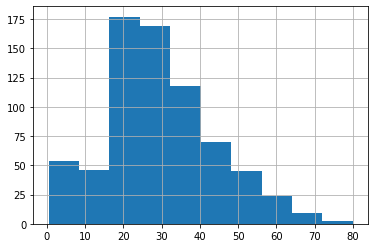

In [51]:
#Explore Age 
data["Age"].hist()
data["Age"].describe()

count    891.000000
mean      29.726061
std       13.902353
min        0.420000
25%       21.000000
50%       28.500000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

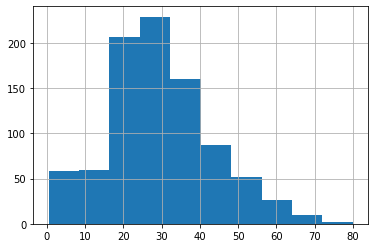

In [52]:
data["Age"] = data["Age"].interpolate()
data["Age"].hist()
data["Age"].describe()

In [53]:
# Explore Embarked
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [54]:
# fill Na with the mode "S"
data["Embarked"].fillna("S",inplace=True)
data["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
# Drop Name, PassengerId and Ticket
data.drop(["Name", "Ticket","PassengerId"],axis = 1,inplace=True)
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,44.5,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [56]:
# make Sex column 0 and 1 
data["is_female"] = data["Sex"].apply(lambda x: 1 if x =="female" else 0)
data.drop("Sex", inplace=True, axis=1)
data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is_female
0,0,3,22.0,1,0,7.2500,S,0
1,1,1,38.0,1,0,71.2833,C,1
2,1,3,26.0,0,0,7.9250,S,1
3,1,1,35.0,1,0,53.1000,S,1
4,0,3,35.0,0,0,8.0500,S,0
5,0,3,44.5,0,0,8.4583,Q,0
6,0,1,54.0,0,0,51.8625,S,0
7,0,3,2.0,3,1,21.0750,S,0
8,1,3,27.0,0,2,11.1333,S,1
9,1,2,14.0,1,0,30.0708,C,1


In [57]:
# Add column is alone
data["family"] = data["SibSp"] + data["Parch"]
data["is_alone"] = data["family"].apply(lambda x: 1 if x>0 else 0)
data["family_Size"] = data["family"] + 1
#data.drop("family",axis=1,inplace=True)
data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,is_female,family,is_alone,family_Size
0,0,3,22.0,1,0,7.2500,S,0,1,1,2
1,1,1,38.0,1,0,71.2833,C,1,1,1,2
2,1,3,26.0,0,0,7.9250,S,1,0,0,1
3,1,1,35.0,1,0,53.1000,S,1,1,1,2
4,0,3,35.0,0,0,8.0500,S,0,0,0,1
5,0,3,44.5,0,0,8.4583,Q,0,0,0,1
6,0,1,54.0,0,0,51.8625,S,0,0,0,1
7,0,3,2.0,3,1,21.0750,S,0,4,1,5
8,1,3,27.0,0,2,11.1333,S,1,2,1,3
9,1,2,14.0,1,0,30.0708,C,1,1,1,2


In [58]:
#get dummy for embarked
data = pd.get_dummies(data)
data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,family,is_alone,family_Size,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,1,2,0,0,1
1,1,1,38.0,1,0,71.2833,1,1,1,2,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,1,1,2,0,0,1
4,0,3,35.0,0,0,8.0500,0,0,0,1,0,0,1
5,0,3,44.5,0,0,8.4583,0,0,0,1,0,1,0
6,0,1,54.0,0,0,51.8625,0,0,0,1,0,0,1
7,0,3,2.0,3,1,21.0750,0,4,1,5,0,0,1
8,1,3,27.0,0,2,11.1333,1,2,1,3,0,0,1
9,1,2,14.0,1,0,30.0708,1,1,1,2,1,0,0


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

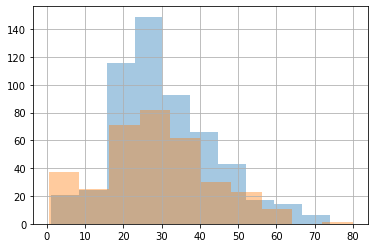

In [59]:
data.groupby('Survived').Age.hist(alpha=0.4)

children are easier to die. From the graph, we can see the gap is at the 17 years old -> add is_child feature

In [60]:
data["is_child"] = data["Age"].apply(lambda x: 1 if x<=17 else 0)
data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,family,is_alone,family_Size,Embarked_C,Embarked_Q,Embarked_S,is_child
0,0,3,22.0,1,0,7.2500,0,1,1,2,0,0,1,0
1,1,1,38.0,1,0,71.2833,1,1,1,2,1,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,0,0,1,0
3,1,1,35.0,1,0,53.1000,1,1,1,2,0,0,1,0
4,0,3,35.0,0,0,8.0500,0,0,0,1,0,0,1,0
5,0,3,44.5,0,0,8.4583,0,0,0,1,0,1,0,0
6,0,1,54.0,0,0,51.8625,0,0,0,1,0,0,1,0
7,0,3,2.0,3,1,21.0750,0,4,1,5,0,0,1,1
8,1,3,27.0,0,2,11.1333,1,2,1,3,0,0,1,0
9,1,2,14.0,1,0,30.0708,1,1,1,2,1,0,0,1


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

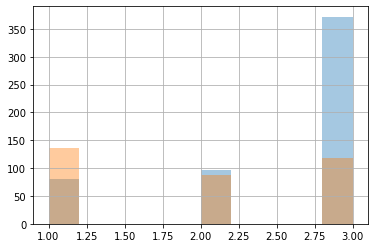

In [61]:
data.groupby('Survived').Pclass.hist(alpha=0.4)

# 3. Model Fitting

In [75]:
Y = data['Survived']
X = data.drop(['Survived'],axis=1)
scalar = pp.StandardScaler()
X = scalar.fit_transform(X)

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

### Logistic Regression

Accuracy on train set 0.800561797752809
Accuracy on test set 0.8379888268156425
CV score 0.7907472613458529
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       121
           1       0.71      0.84      0.77        58

    accuracy                           0.84       179
   macro avg       0.81      0.84      0.82       179
weighted avg       0.85      0.84      0.84       179



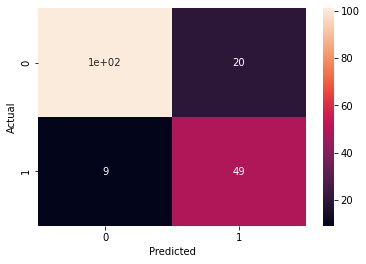

In [76]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_base = model_lr.predict(X_train)
y_lr = model_lr.predict(X_test)
print("Accuracy on train set {}".format(accuracy_score(y_train,y_base)))
print("Accuracy on test set {}".format(accuracy_score(y_test,y_lr)))
CV_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=10, scoring="accuracy")
print("CV score {}".format(CV_scores_lr.mean()))

print(classification_report(y_test, y_lr))
confusion_matrix_LR = pd.crosstab(y_test, y_lr, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_LR, annot=True)
plt.show()

### SVM

In [77]:
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1,1,2]}
gscv_r = GridSearchCV(svm.SVC(), parameters, cv=5)
gscv_r.fit(X_train, y_train)
gscv_r.best_params_


{'gamma': 0.1}

Accuracy on train set 0.8230337078651685
Accuracy on test set 0.8603351955307262
CV score 0.8118348982785604
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       121
           1       0.76      0.83      0.79        58

    accuracy                           0.86       179
   macro avg       0.84      0.85      0.84       179
weighted avg       0.86      0.86      0.86       179



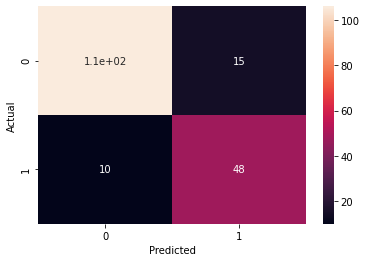

In [78]:
model_svm = svm.SVC(gamma=0.1 ,C=1)
model_svm.fit(X_train, y_train)
y_base = model_svm.predict(X_train)
y_svm = model_svm.predict(X_test)
print("Accuracy on train set {}".format(accuracy_score(y_train,y_base)))
print("Accuracy on test set {}".format(accuracy_score(y_test,y_svm)))
CV_scores_svm = cross_val_score(model_svm, X_train, y_train, cv=10, scoring="accuracy")
print("CV score {}".format(CV_scores_svm.mean()))
print(classification_report(y_test, y_svm))
confusion_matrix_LR = pd.crosstab(y_test, y_svm, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_LR, annot=True)
plt.show()

### Decision Tree

Accuracy on train set 0.9887640449438202
Accuracy on test set 0.770949720670391
CV score 0.7400430359937402
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       121
           1       0.62      0.74      0.68        58

    accuracy                           0.77       179
   macro avg       0.74      0.76      0.75       179
weighted avg       0.79      0.77      0.78       179



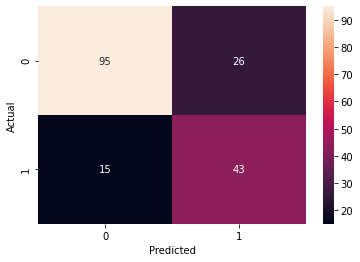

In [79]:
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)
y_base = model_dt.predict(X_train)
y_dt = model_dt.predict(X_test)
print("Accuracy on train set {}".format(accuracy_score(y_train,y_base)))
print("Accuracy on test set {}".format(accuracy_score(y_test,y_dt)))
CV_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=10, scoring="accuracy")
print("CV score {}".format(CV_scores_dt.mean()))

print(classification_report(y_test, y_dt))
confusion_matrix_LR = pd.crosstab(y_test, y_dt, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_LR, annot=True)
plt.show()

Accuracy on train set is a lot higher than Accuracy on test -> Overfitting 

In [80]:
parameters_refine = {
    'max_depth': [1,None,5,10], 
    'min_samples_split':[10,20,30,50],
    'min_samples_leaf':[1,5,10,20,30],
}
gscv_r = GridSearchCV(DecisionTreeClassifier(), parameters_refine, cv=5)
gscv_r.fit(X_train, y_train)
gscv_r.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}

Accuracy on train set 0.8286516853932584
Accuracy on test set 0.8212290502793296
CV score 0.761189358372457
              precision    recall  f1-score   support

           0       0.88      0.85      0.87       121
           1       0.71      0.76      0.73        58

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.83      0.82      0.82       179



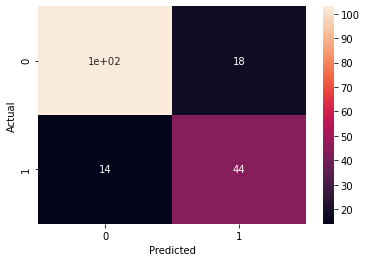

In [81]:
model_dt = DecisionTreeClassifier(max_depth= 5, min_samples_leaf = 1,min_samples_split = 10,random_state=1)
model_dt.fit(X_train, y_train)
y_base = model_dt.predict(X_train)
y_dt = model_dt.predict(X_test)
print("Accuracy on train set {}".format(accuracy_score(y_train,y_base)))
print("Accuracy on test set {}".format(accuracy_score(y_test,y_dt)))
CV_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=10, scoring="accuracy")
print("CV score {}".format(CV_scores_dt.mean()))

print(classification_report(y_test, y_dt))
confusion_matrix_LR = pd.crosstab(y_test, y_dt, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_LR, annot=True)
plt.show()

### Random Forest Regression

Accuracy on train set 0.9887640449438202
Accuracy on test set 0.8044692737430168
CV score 0.786482785602504
              precision    recall  f1-score   support

           0       0.89      0.81      0.85       121
           1       0.67      0.79      0.72        58

    accuracy                           0.80       179
   macro avg       0.78      0.80      0.79       179
weighted avg       0.82      0.80      0.81       179



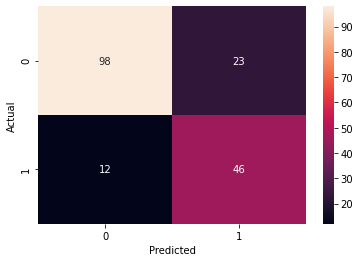

In [82]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, y_train)
y_base = model_rf.predict(X_train)
y_rf = model_rf.predict(X_test)
print("Accuracy on train set {}".format(accuracy_score(y_train,y_base)))
print("Accuracy on test set {}".format(accuracy_score(y_test,y_rf)))
CV_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=10, scoring="accuracy")
print("CV score {}".format(CV_scores_rf.mean()))

print(classification_report(y_test, y_rf))
confusion_matrix_LR = pd.crosstab(y_test, y_rf, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_LR, annot=True)
plt.show()

In [83]:
parameters_refine = {
    'max_depth': [1,None,5,10], 
    'min_samples_leaf': [1,5,10,20],
    'n_estimators' : [200,300,400],
}
gscv_r = GridSearchCV(RandomForestClassifier(), parameters_refine, cv=10)
gscv_r.fit(X_train, y_train)
gscv_r.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 300}

Accuracy on train set 0.9536516853932584
Accuracy on test set 0.8435754189944135
CV score 0.810348200312989
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       121
           1       0.74      0.79      0.77        58

    accuracy                           0.84       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.85      0.84      0.84       179



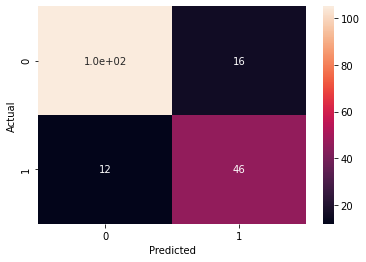

In [84]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_leaf = 1, n_estimators = 300, random_state=1)
model_rf.fit(X_train, y_train)
y_base = model_rf.predict(X_train)
y_rf = model_rf.predict(X_test)
print("Accuracy on train set {}".format(accuracy_score(y_train,y_base)))
print("Accuracy on test set {}".format(accuracy_score(y_test,y_rf)))
CV_scores_rf= cross_val_score(model_rf, X_train, y_train, cv=10, scoring="accuracy")
print("CV score {}".format(CV_scores_rf.mean()))

print(classification_report(y_test, y_rf))
confusion_matrix_LR = pd.crosstab(y_test, y_rf, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix_LR, annot=True)
plt.show()

### KNN

In [85]:
param_grid = {'n_neighbors': np.arange(1,50,1)}
gscv_rfc = GridSearchCV(neighbors.KNeighborsClassifier(), param_grid, scoring='accuracy', cv=10)
gscv_rfc.fit(X_train, y_train)
gscv_rfc.best_params_

{'n_neighbors': 18}

Accuracy on train set 0.8103932584269663
Accuracy on test set 0.8379888268156425
CV score 0.7851525821596244
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       121
           1       0.74      0.78      0.76        58

    accuracy                           0.84       179
   macro avg       0.81      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179



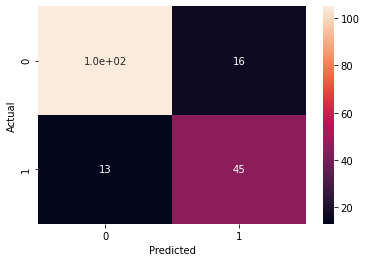

In [86]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors =18)
model_knn.fit(X_train, y_train)
y_base = model_knn.predict(X_train)
y_knn = model_knn.predict(X_test)
print("Accuracy on train set {}".format(accuracy_score(y_train,y_base)))
print("Accuracy on test set {}".format(accuracy_score(y_test,y_knn)))
CV_scores_knn= cross_val_score(model_knn, X_train, y_train, cv=10, scoring="accuracy")
print("CV score {}".format(CV_scores_knn.mean()))

print(classification_report(y_test, y_knn))
confusion_matrix = pd.crosstab(y_test, y_knn, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True)
plt.show()

### Comparison

In [87]:
result = pd.DataFrame(columns=('Model Type', 'Accuracy','Precision','Recall','F1_score',"CV"))
result.loc[0]= ["Logistic Regression", accuracy_score(y_test, y_lr), precision_score(y_test, y_lr),recall_score(y_test, y_lr),f1_score(y_test, y_lr),CV_scores_lr.mean()]
result.loc[1]= ["SVM", accuracy_score(y_test, y_svm), precision_score(y_test, y_svm),recall_score(y_test, y_svm),f1_score(y_test, y_svm),CV_scores_svm.mean()]
result.loc[2]= ["Decision Tree", accuracy_score(y_test, y_dt), precision_score(y_test, y_dt),recall_score(y_test, y_dt),f1_score(y_test, y_dt),CV_scores_dt.mean()]
result.loc[3]= ["Random Forest", accuracy_score(y_test, y_rf), precision_score(y_test, y_rf),recall_score(y_test, y_rf),f1_score(y_test, y_rf),CV_scores_rf.mean()]
result.loc[4]= ["Nearest Neighbors", accuracy_score(y_test, y_knn), precision_score(y_test, y_knn),recall_score(y_test, y_knn),f1_score(y_test, y_knn),CV_scores_knn.mean()]
result

,Model Type,Accuracy,Precision,Recall,F1_score,CV
0,Logistic Regression,0.837989,0.710145,0.844828,0.771654,0.790747
1,SVM,0.860335,0.761905,0.827586,0.793388,0.811835
2,Decision Tree,0.821229,0.709677,0.758621,0.733333,0.761189
3,Random Forest,0.843575,0.741935,0.793103,0.766667,0.810348
4,Nearest Neighbors,0.837989,0.737705,0.775862,0.756303,0.785153


Comparison 
The performace of the model will be measured by accuracy precision and F score
- SVM: The Accuracy, Precision, F1_score and CV accuracy score are highest. The model has best performce. Choose SVM 
- Random Forest: Random Forest model has less overfitting, but preformance is worse than SVM
- Logistic Regression: Comparing to other models, logistic regression has lower accuracy and precision. Also, because the dataset is small, the performance fluctuated a lot with different train test splits. 
- Decision Tree: Overfitting, low precision, low accuracy and low F1_score
- Nearest Neighbors: Low accuracy, low precision , low F1_score

In [88]:
filename = "finalized_model.sav"
pickle.dump(model_svm, open(filename, 'wb'))

# 4.Prediction on Test Data

In [89]:
data = pd.read_csv('holdout_test.csv')
data.head(10)

,Survived,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,NaN,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,NaN,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,NaN,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,NaN,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,NaN,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,NaN,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,NaN,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,NaN,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,NaN,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,NaN,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [90]:
(data.isna().sum()/len(data)).sort_values(ascending=False)

Survived       1.000000
Cabin          0.782297
Age            0.205742
Fare           0.002392
PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Embarked       0.000000
dtype: float64

In [91]:
data.drop("Cabin", axis=1, inplace=True)
data["Age"] = data["Age"].interpolate()
data["Fare"] = data["Fare"].interpolate()
data.drop(["Name", "Ticket","PassengerId"],axis = 1,inplace=True)
data["is_female"] = data["Sex"].apply(lambda x: 1 if x =="female" else 0)
data.drop("Sex", inplace=True, axis=1)
data["family"] = data["SibSp"] + data["Parch"]
data["is_alone"] = data["family"].apply(lambda x: 1 if x>0 else 0)
data["family_Size"] = data["family"] + 1
data = pd.get_dummies(data)
data["is_child"] = data["Age"].apply(lambda x: 1 if x<=17 else 0)
data.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,family,is_alone,family_Size,Embarked_C,Embarked_Q,Embarked_S,is_child
0,NaN,3,34.5,0,0,7.8292,0,0,0,1,0,1,0,0
1,NaN,3,47.0,1,0,7.0000,1,1,1,2,0,0,1,0
2,NaN,2,62.0,0,0,9.6875,0,0,0,1,0,1,0,0
3,NaN,3,27.0,0,0,8.6625,0,0,0,1,0,0,1,0
4,NaN,3,22.0,1,1,12.2875,1,2,1,3,0,0,1,0
5,NaN,3,14.0,0,0,9.2250,0,0,0,1,0,0,1,1
6,NaN,3,30.0,0,0,7.6292,1,0,0,1,0,1,0,0
7,NaN,2,26.0,1,1,29.0000,0,2,1,3,0,0,1,0
8,NaN,3,18.0,0,0,7.2292,1,0,0,1,1,0,0,0
9,NaN,3,21.0,2,0,24.1500,0,2,1,3,0,0,1,0


In [92]:
X = data.drop("Survived", axis=1)
X = scalar.transform(X)

In [93]:
loaded_model = pickle.load(open(filename, 'rb'))
Y = loaded_model.predict(X)

In [94]:
df = pd.DataFrame({"results": Y})
df.to_csv("Results.csv", header = 0, index =0)

In [95]:
df.head(10)

,results
0,0
1,1
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0


In [96]:
data.shape

(418, 14)

In [97]:
df.shape

(418, 1)